## How to handle Categorical Missing Value

#### Frequent Category Imputation

In [2]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df = pd.read_csv('loan.csv', usecols =['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


Note: We took only three features to demonstrate how to handle categorical missing value. We can take more

In [5]:
df.shape # There are 1460 records

(1460, 4)

In [6]:
df.isnull().sum() # These are the missing values. SalesPrice has 0 Null values

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

Since there are less missing values in BsmtQual and GarageType - We can replace them with frequent number of categories
Doing so will not distort the dataset

In [7]:
df.isnull().mean().sort_values(ascending = True) # This gives %age and in sorted order

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

In [8]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar(color = 'blue')

# The count() Takes exactly one arguement -->> SQL Aggregate function

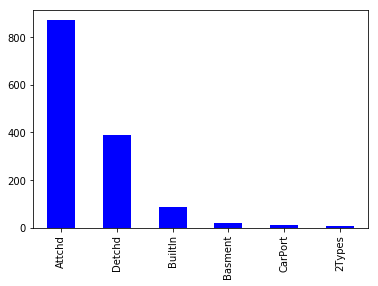

In [9]:
df['GarageType'].value_counts().plot.bar(color = 'blue')


In [10]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

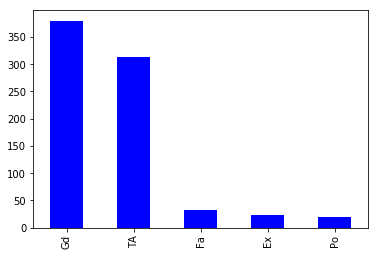

In [11]:
df['FireplaceQu'].value_counts().plot.bar(color = 'blue')

In [12]:
## Replacing function

def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [13]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [14]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64


#### Advantages
    - Easy To implement
    - Faster way to implement 

#### Disadvantages
    - Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
    - It distorts the relation of the most frequent label

Example: 'FireplaceQu' has more nan values (600+), so it distort the relation

### Adding a variable to capture NAN

In [15]:
df = pd.read_csv('loan.csv', usecols =['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [16]:
# We will create another feature that will tell us if we have null values or not
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [17]:
frequent = df['BsmtQual'].mode()[0] # We arereading the 0th index

In [18]:
df['BsmtQual'].fillna(frequent, inplace=True) # Fill na with most frequent category
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [19]:
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


The best part of the technique is we can use it for many NAN values. Go ahead and use this technique

### Suppose you have more frequent categories -->> we replace NAN with a new Category!! (This is a really common technique)

In [20]:
df = pd.read_csv('loan.csv', usecols =['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [21]:
def impute_nan(df, variable):
    df[variable+'_new_var']= np.where(df[variable].isnull(),"Missing", df[variable]) #This sayswe will replace null values with Missing or enter the variable
    

In [22]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [23]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [27]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1) # Drop the initial 3 columns as we have replaced the missing values 
df.head()

,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
